In [1]:
from scipy import sparse
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

train = sparse.load_npz("train.npz")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
scaler = StandardScaler()

In [3]:
x_train = pd.DataFrame(train.todense())



In [4]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,77878,77879,77880,77881,77882,77883,77884,77885,77886,77887
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=5, random_state=123)

In [19]:
x_center = x_train - x_train.mean(axis=0)
x_center.mean(axis=0)

0       -4.197187e-18
1        5.181219e-18
2       -1.746669e-19
3        1.542202e-18
4       -8.334938e-18
             ...     
77883    4.687855e-18
77884   -4.836469e-19
77885    3.143648e-18
77886   -2.716040e-18
77887   -4.543231e-18
Length: 77888, dtype: float64

In [8]:
X_new = pca.fit_transform(x_center)

c:\Users\vikel\anaconda3\envs\my_env\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\vikel\anaconda3\envs\my_env\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\vikel\anaconda3\envs\my_env\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [9]:
X_new.shape

(14590, 5)

In [10]:
import hdbscan
clusterer1 = hdbscan.HDBSCAN(min_cluster_size=5, cluster_selection_epsilon=1)
clusterer1.fit(X_new)
cluster_colors = clusterer1.labels_


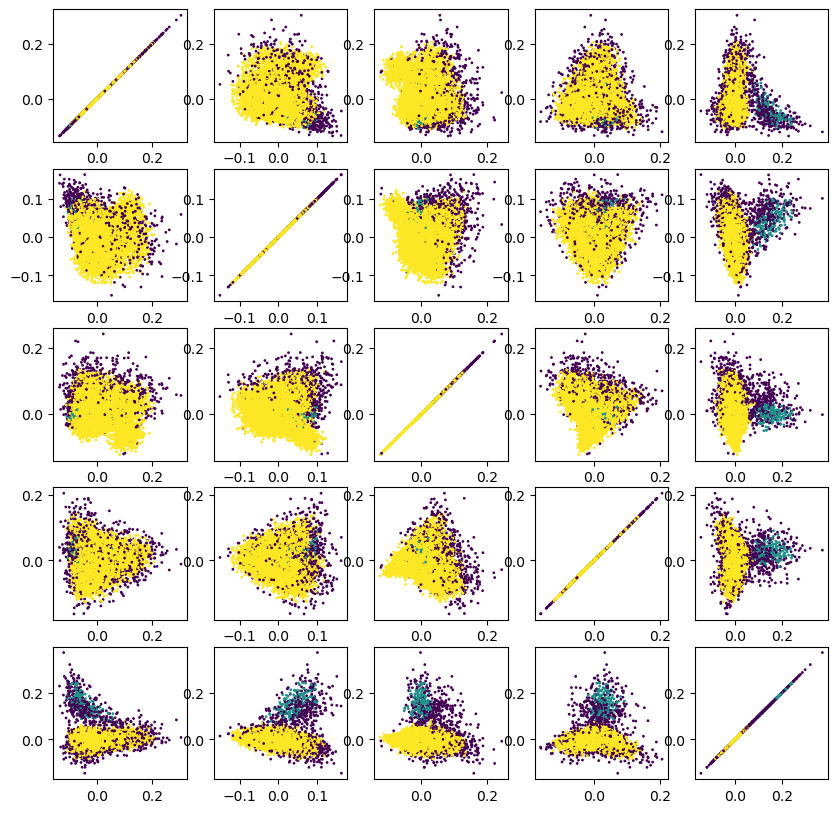

In [11]:
fig = plt.figure(figsize = (10,10))
for i in range(5):
    for j in range (5):
        plt.subplot(5,5,i+5*j + 1)
        plt.scatter(X_new[:,i], X_new[:,j], c=cluster_colors,s = 1)
plt.show()

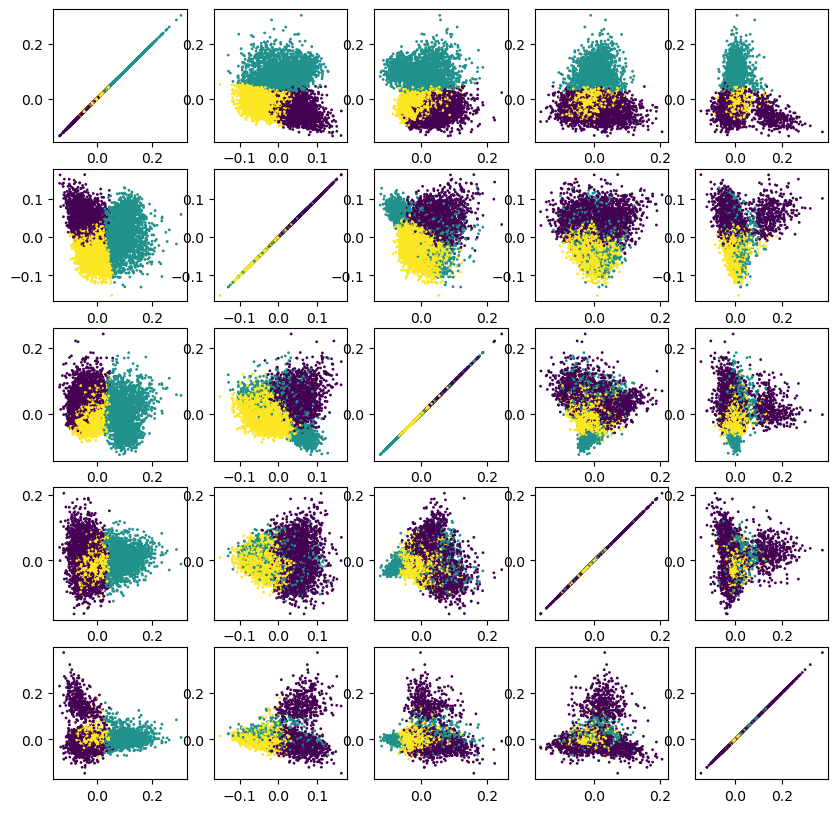

In [13]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, random_state=1, n_init='auto').fit(X_new)
    
fig = plt.figure(figsize = (10,10))
for i in range(5):
    for j in range (5):
        plt.subplot(5,5,i+5*j + 1)
        plt.scatter(X_new[:,i], X_new[:,j], c=kmeans.labels_,s = 1)
plt.show()

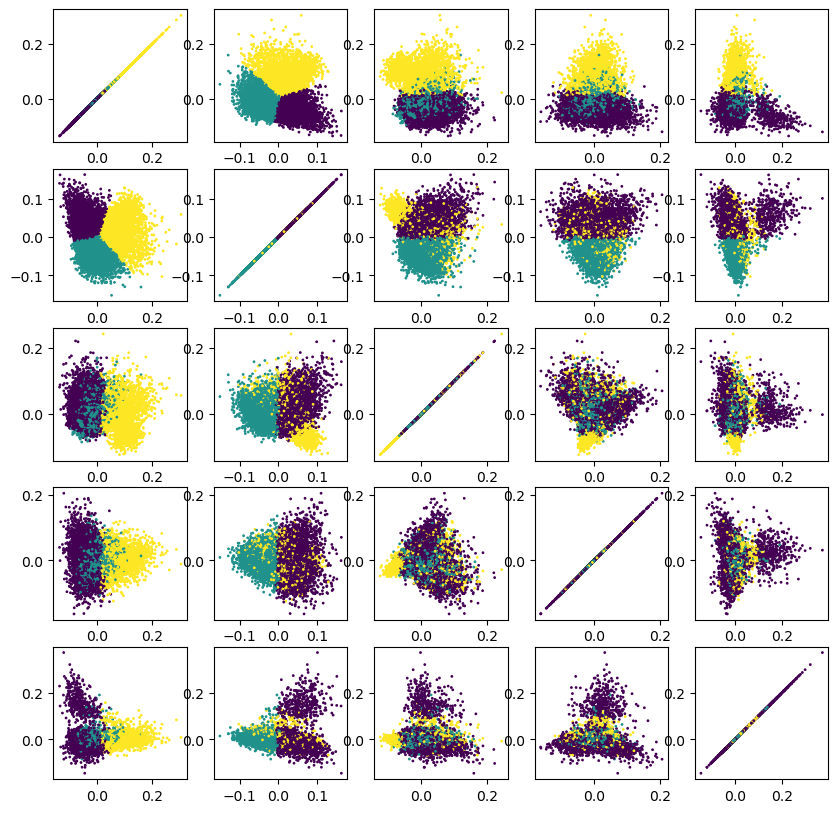

In [31]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=3,
        assign_labels='discretize',
        random_state=0).fit(X_new)

fig = plt.figure(figsize = (10,10))
for i in range(5):
    for j in range (5):
        plt.subplot(5,5,i+5*j + 1)
        plt.scatter(X_new[:,i], X_new[:,j], c=clustering.labels_,s = 1)
plt.show()

In [32]:
result_df = pd.DataFrame(columns=['ID','TARGET'])

result_df["ID"] = [i for i in range (len(X_new))]
result_df['TARGET'] = clustering.labels_

result_df[["ID", "TARGET"]].to_csv("result.csv", index=False)